In [32]:
import pandas as pd

%load_ext autoreload
%autoreload 2
from vm_placement.data_handling import Data
from vm_placement.data_handling.sorting import calculate_scarcity_ratio, sort_by_scarcity_ratio
from vm_placement.algorithms.fit_algos import FirstFitAlgo
from vm_placement.data_handling.processing import resource_columns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Loading

In [33]:
server_capacity = pd.DataFrame({
    'vCPU': [316],
    'Memory': [1071],
    'Storage': [5000]
})
data = Data(
    vm_filepath='data/vm_data.csv',
    unique_server=server_capacity
)

In [34]:
data.vm_data

,vCPU,Memory,Storage,Class
0,4,8.0,10.23,1
1,8,16.0,10.23,1
2,2,4.0,32.00,1
3,2,4.0,32.00,1
4,4,8.0,10.23,1
...,...,...,...,...
859,2,8.0,2048.00,3
860,4,4.0,32.00,3
861,4,4.0,32.00,3
862,4,4.0,32.00,3


In [35]:
data.server_data

,vCPU,Memory,Storage
0,316,1071,5000
1,316,1071,5000
2,316,1071,5000
3,316,1071,5000
4,316,1071,5000
...,...,...,...
859,316,1071,5000
860,316,1071,5000
861,316,1071,5000
862,316,1071,5000


# Nominal case
## Best-fit
### No sorting

864it [00:02, 357.18it/s]


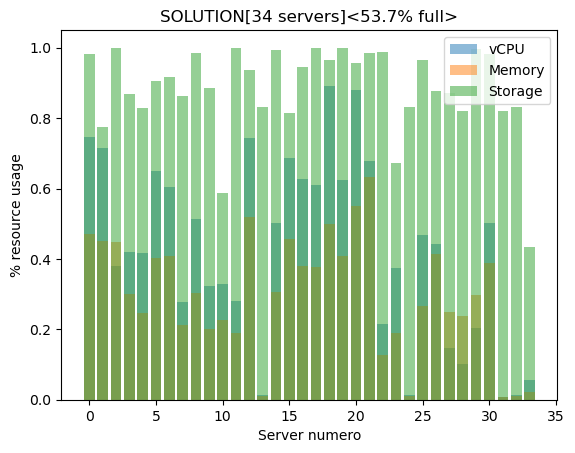

Filling rates
vCPU       0.425168
Memory     0.300890
Storage    0.885418
dtype: float64


In [53]:
solution_first_fit = FirstFitAlgo().solve(data.vm_data, data.server_data)
solution_first_fit.display()

### Sorting by scarcity index

In [44]:
scarcity_ratio = calculate_scarcity_ratio(data)
scarcity_ratio

vCPU       0.016731
Memory     0.011841
Storage    0.034843
dtype: float64

In [45]:
sorted_vms = sort_by_scarcity_ratio(data.vm_data, scarcity_ratio)
sorted_vms

,vCPU,Memory,Storage,Class
857,2,8.0,4096.0,3
367,2,8.0,4096.0,2
856,2,8.0,4096.0,3
752,2,8.0,4096.0,3
91,24,96.0,1200.0,2
...,...,...,...,...
782,1,2.0,32.0,3
783,1,2.0,32.0,3
725,1,1.0,32.0,3
781,1,1.0,32.0,3


864it [00:02, 429.36it/s]


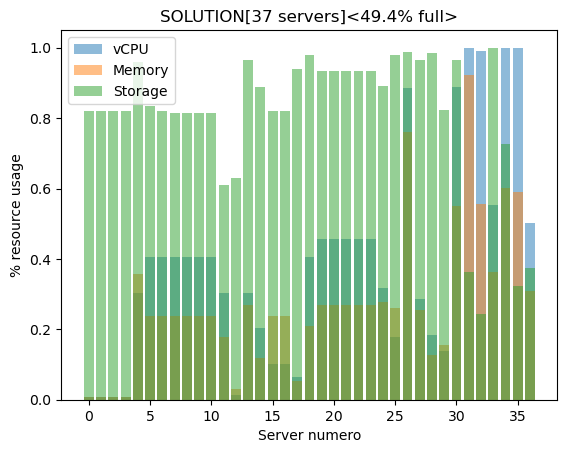

Filling rates
vCPU       0.390694
Memory     0.276494
Storage    0.813628
dtype: float64


In [47]:
first_fit = FirstFitAlgo()
solution = first_fit.solve(sorted_vms, data.server_data)
solution.display()

## Best-Fit
### Using the scarcity ratio for sorting

864it [00:28, 30.30it/s]


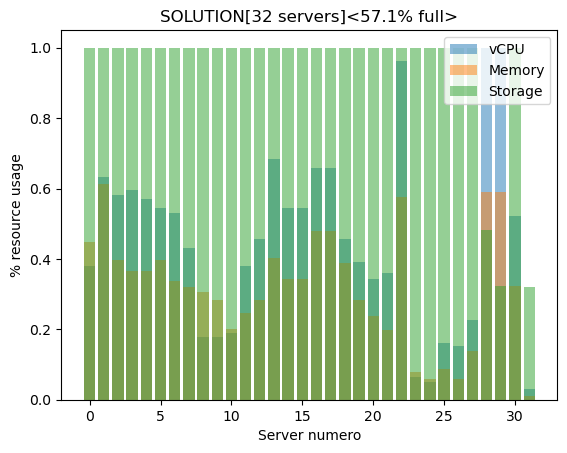

Filling rates
vCPU       0.451741
Memory     0.319696
Storage    0.940757
dtype: float64


In [54]:
from vm_placement.algorithms.fit_algos import BestFitAlgo

best_fit = BestFitAlgo(sorting_criterion='weighted_resources')
solution = best_fit.solve(sorted_vms, data.server_data, scarcity_ratio)
solution.display()

864it [00:24, 34.72it/s]


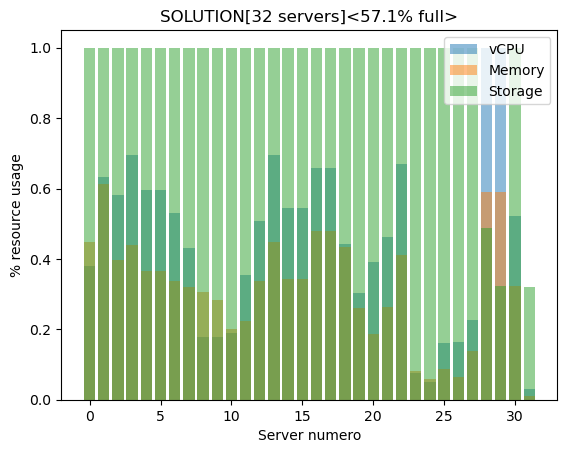

Filling rates
vCPU       0.451741
Memory     0.319696
Storage    0.940757
dtype: float64


In [49]:
sorted_vms = data.vm_data.sort_values(['Memory', 'vCPU', 'Storage'], ascending=False)
best_fit = BestFitAlgo(sorting_criterion=['Memory', 'vCPU', 'Storage'])
solution = best_fit.solve(sorted_vms, data.server_data, scarcity_ratio)
solution.display()

# Handle Partial VMs

864it [00:01, 540.72it/s]


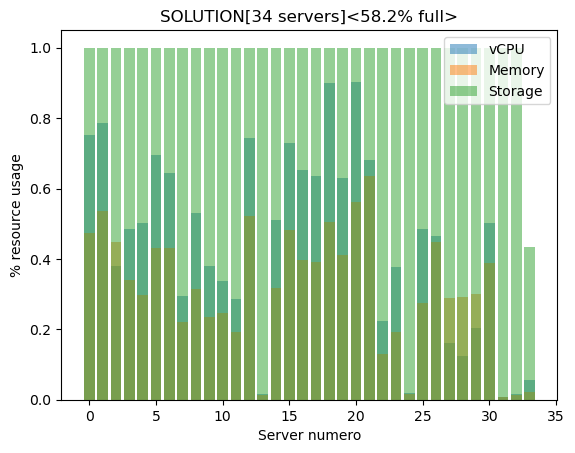

Filling rates
vCPU       0.444771
Memory     0.317048
Storage    0.983388
dtype: float64


In [50]:
from vm_placement.algorithms.fit_algos import FirstFitDivideAlgo

first_fit_divide = FirstFitDivideAlgo()
solution = first_fit_divide.solve(data.vm_data, data.server_data)
solution.display()

### Let's sort the VMS by Memory

864it [00:01, 555.80it/s]


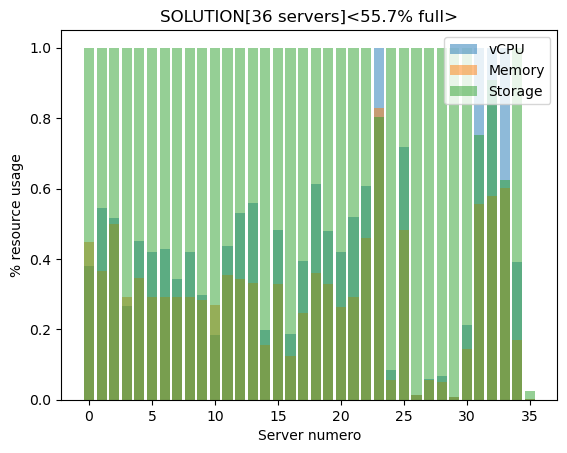

Filling rates
vCPU       0.423130
Memory     0.300194
Storage    0.947570
dtype: float64


In [51]:
vms_sorted_by_memory = data.vm_data.sort_values('Memory', ascending=False)
first_fit_divide = FirstFitDivideAlgo()
solution = first_fit_divide.solve(vms_sorted_by_memory, data.server_data)
solution.display()

## Autres tentatives

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(data.vm_data[resource_columns])
kmeans.cluster_centers_

array([[3.14424411e+00, 7.42024965e+00, 3.38794730e+01],
       [1.65869565e+01, 4.01639130e+01, 7.72159638e+02],
       [2.40000000e+00, 1.28000000e+01, 3.90720000e+03]])

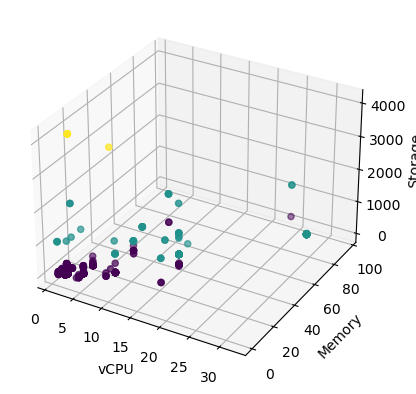

In [51]:
import matplotlib.pyplot as plt

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(data.vm_data['vCPU'], data.vm_data['Memory'], data.vm_data['Storage'],
           c=kmeans.labels_)

# Set axis labels
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory')
ax.set_zlabel('Storage')

# Show plot
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [20.0, 20.0, 44.6875, 44.6875],
  [5.0, 5.0, 32.34375, 32.34375],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [18.671875, 18.671875, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [295.0, 295.0, 313.75, 313.75],
  [285.0, 285.0, 304.375, 304.375],
  [275.0, 275.0, 294.6875, 294.6875],
  [265.0, 265.0, 284.84375, 284.84375],
  [255.0, 255.0, 274.921875, 274.921875],
  [245.0, 245.0, 264.9609375, 264.9609375],
  [235.0, 235.0, 254.98046875, 254.98046875],
  [225.0, 225.0, 244.990234375, 244.99023437

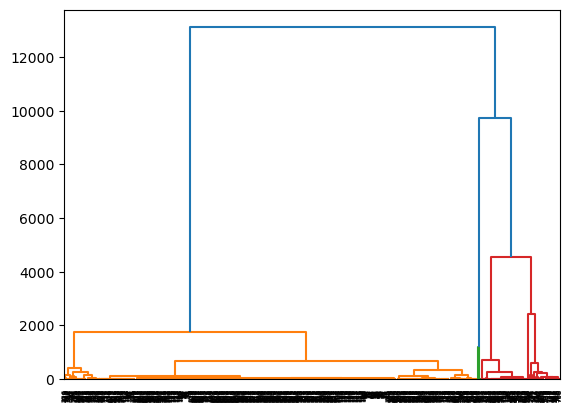

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data.vm_data[resource_columns], method='ward')
dendrogram(Z)